## Quick look at a ComStock run, and extract to individual building load shapes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
#%matplotlib ipympl

In [2]:
weighted = True
year=2012

if year==2012:
    datadir = '2012_ComStock(01 04 2021 from Andrew)'
else:
    datadir = 'FullData(12 07 2020 from Andrew)'
indir = r"G:\Shared drives\BTO Topic 2  Integrating EE & DR\Task 2\Load_Shape_Data\ComStock\{d}".format(d=datadir)
upgrade = 'envelope_plus_controls_plus_equipment'
data_file = r'timeseries_{w}weighted\{u}_{w}weighted.csv'.format(u=upgrade,  w='' if weighted else 'un')
bc_file = r'counts_with_weights\{u}-building_counts_weighted.csv'.format(u=upgrade)
meta_file = r'eedr_{y}_metadata\{y}_{s}_bldg_metadata.parquet'
n_hr=8760

In [3]:
#First look at building counts

In [4]:
bc = pd.read_csv(os.path.join(indir,bc_file))

In [5]:
bc

weather_station location  building_area  \
0     USA_LA_Lake.Charles.Muni.722400_2012.epw       2A           3000   
1     USA_LA_Lake.Charles.Muni.722400_2012.epw       2A          75000   
2     USA_LA_Lake.Charles.Muni.722400_2012.epw       2A          17500   
3            USA_TX_Alice.Intl.722517_2012.epw       2A           7500   
4            USA_TX_Alice.Intl.722517_2012.epw       2A           7500   
...                                        ...      ...            ...   
6773     USA_CA_Bishop.Airport.724800_2012.epw       6B          37500   
6774     USA_CA_Bishop.Airport.724800_2012.epw       6B          17500   
6775     USA_CA_Bishop.Airport.724800_2012.epw       6B           7500   
6776     USA_CA_Bishop.Airport.724800_2012.epw       6B          17500   
6777   USA_NV_Reno.Cannon.Intl.724880_2012.epw       6B          37500   

              building_type  building_count     weight  \
0     FullServiceRestaurant               1  11.590606   
1             PrimarySchool               1  13.871553   
2           SecondarySchool               2   6.958371   
3               LargeOffice               1   9.625838   
4                Outpatient               1   5.369615   
...                     ...             ...        ...   
6773        RetailStripmall               1   2.110621   
6774        SecondarySchool               1   6.958371   
6775             SmallHotel               1   5.062002   
6776             SmallHotel               1   5.062002   
6777             SmallHotel               1   5.062002   

      vizstock_doe_eedr_lbnl_2012_climate_zone_upgrade  
0                                                    5  
1                                                    5  
2                                                    5  
3                                                    5  
4                                                    5  
...                                                ...  
6773                                                 5  
6774                                                 5  
6775                                                 5  
6776                                                 5  
6777                                                 5  

[6778 rows x 7 columns]

In [6]:
bc.loc[bc['weather_station'].str.contains('Fresno')]

weather_station location  building_area  \
2514  USA_CA_Fresno.Air.Terminal.723890_2012.epw       3B           1000   
2515  USA_CA_Fresno.Air.Terminal.723890_2012.epw       3B           3000   
2516  USA_CA_Fresno.Air.Terminal.723890_2012.epw       3B           7500   
2517  USA_CA_Fresno.Air.Terminal.723890_2012.epw       3B          17500   
2518  USA_CA_Fresno.Air.Terminal.723890_2012.epw       3B        1000000   
...                                          ...      ...            ...   
2570  USA_CA_Fresno.Air.Terminal.723890_2012.epw       3B           7500   
2571  USA_CA_Fresno.Air.Terminal.723890_2012.epw       3B          17500   
2572  USA_CA_Fresno.Air.Terminal.723890_2012.epw       3B          37500   
2573  USA_CA_Fresno.Air.Terminal.723890_2012.epw       3B          75000   
2574  USA_CA_Fresno.Air.Terminal.723890_2012.epw       3B         150000   

              building_type  building_count     weight  \
2514  FullServiceRestaurant               3  11.590606   
2515  FullServiceRestaurant              20  11.590606   
2516  FullServiceRestaurant              19  11.590606   
2517  FullServiceRestaurant               3  11.590606   
2518               Hospital               2   8.751376   
...                     ...             ...        ...   
2570              Warehouse              22   2.108605   
2571              Warehouse              70   2.108605   
2572              Warehouse             111   2.108605   
2573              Warehouse             105   2.108605   
2574              Warehouse              38   2.108605   

      vizstock_doe_eedr_lbnl_2012_climate_zone_upgrade  
2514                                                 5  
2515                                                 5  
2516                                                 5  
2517                                                 5  
2518                                                 5  
...                                                ...  
2570                                                 5  
2571                                                 5  
2572                                                 5  
2573                                                 5  
2574                                                 5  

[61 rows x 7 columns]

In [7]:
#Now look at summary data
meta = pd.read_parquet(os.path.join(indir,meta_file.format(y=year, s='fast')))
meta = meta.append(pd.read_parquet(os.path.join(indir,meta_file.format(y=year, s='slow'))))
meta

applicability  bldg_id climate_zone  in.aspect_ratio  in.building_type  \
0              True        6           3B              2.0         Warehouse   
1              True        9           2A              4.0         Warehouse   
2              True       14           3B              2.0       SmallOffice   
3              True       17           2A              2.0     PrimarySchool   
4              True       18           2A              1.0  RetailStandalone   
...             ...      ...          ...              ...               ...   
4988           True   349656           5A              2.0        Outpatient   
4989           True   349665           2A              1.0       LargeOffice   
4990           True   349670           3C              2.0        Outpatient   
4991           True   349945           3A              2.0        Outpatient   
4992           True   349998           3B              1.0        Outpatient   

         in.climate_zone in.code_when_built in.cooling_fuel  \
0     ASHRAE 169-2013-3B          1978_1993     Electricity   
1     ASHRAE 169-2013-2A          1978_1993     Electricity   
2     ASHRAE 169-2013-3B          1993_2002     Electricity   
3     ASHRAE 169-2013-2A           pre_1978     Electricity   
4     ASHRAE 169-2013-2A           pre_1978     Electricity   
...                  ...                ...             ...   
4988  ASHRAE 169-2013-5A           pre_1978     Electricity   
4989  ASHRAE 169-2013-2A          1993_2002     Electricity   
4990  ASHRAE 169-2013-3C           pre_1978     Electricity   
4991  ASHRAE 169-2013-3A          1993_2002     Electricity   
4992  ASHRAE 169-2013-3B          2010_2014     Electricity   

     in.current_envelope_code in.current_exterior_lighting_code  ...  \
0                   1978_1993                         2010_2014  ...   
1                   1978_1993                         1993_2002  ...   
2                   1993_2002                         2006_2010  ...   
3                    pre_1978                         2006_2010  ...   
4                    pre_1978                         2002_2006  ...   
...                       ...                               ...  ...   
4988                 pre_1978                         2006_2010  ...   
4989                1993_2002                         2006_2010  ...   
4990                 pre_1978                         2002_2006  ...   
4991                1993_2002                         2006_2010  ...   
4992                2010_2014                         2010_2014  ...   

     out.other_fuel.water_systems.energy_savings_intensity  \
0                                                   0.0      
1                                                   0.0      
2                                                   0.0      
3                                                   0.0      
4                                                   0.0      
...                                                 ...      
4988                                                0.0      
4989                                                0.0      
4990                                                0.0      
4991                                                0.0      
4992                                                0.0      

     out.site_energy.total.energy_consumption  \
0                                5.877006e+05   
1                                1.722410e+05   
2                                3.826653e+04   
3                                3.199886e+06   
4                                1.170837e+06   
...                                       ...   
4988                             8.799940e+05   
4989                             1.939921e+06   
4990                             5.356703e+05   
4991                             8.953440e+05   
4992                             9.241411e+05   

     out.site_energy.total.energy_consumption_intensity  \
0                             

In [8]:
meta.columns.values

array(['applicability', 'bldg_id', 'climate_zone', 'in.aspect_ratio',
       'in.building_type', 'in.climate_zone', 'in.code_when_built',
       'in.cooling_fuel', 'in.current_envelope_code',
       'in.current_exterior_lighting_code', 'in.current_hvac_code',
       'in.current_interior_equipment_code',
       'in.current_interior_lighting_code', 'in.floor_height',
       'in.heating_fuel', 'in.hvac_delivery_type', 'in.hvac_system_type',
       'in.number_of_stories', 'in.rotation', 'in.sqft',
       'in.water_systems_fuel', 'in.weather_station',
       'in.weekday_opening_time', 'in.weekday_operating_hours',
       'in.weekend_opening_time', 'in.weekend_operating_hours',
       'out.electricity.cooling.energy_consumption',
       'out.electricity.cooling.energy_consumption_intensity',
       'out.electricity.cooling.energy_savings',
       'out.electricity.cooling.energy_savings_intensity',
       'out.electricity.exterior_lighting.energy_consumption',
       'out.electricity.exterior

In [9]:
meta['climate_zone'].unique()

array(['3B', '2A', '3C', '5A', '6A', '3A', '4B', '2B', '5B', '6B'],
      dtype=object)

In [10]:
sel_up = (meta['upgrade']==0) & meta['applicability'] & meta['in.applicable']

summ = meta.loc[sel_up].groupby(['in.weather_station','climate_zone','in.building_type', 'in.sqft']).agg(
        {
            'bldg_id': 'count',
            'out.electricity.fans.energy_consumption': lambda x: (x>0).sum(),
            'out.electricity.cooling.energy_consumption': lambda x: (x>0).sum(),
            'out.electricity.heating.energy_consumption': lambda x: (x>0).sum(),
            'out.electricity.refrigeration.energy_consumption': lambda x: (x>0).sum(),
            'out.electricity.water_systems.energy_consumption': lambda x: (x>0).sum(),
        }).reset_index().rename(columns=
        {
            'in.weather_station':'weather_station',
            'in.building_type':'building_type',
            'in.sqft': 'sqft',
            'bldg_id':'num_buildings',
            'out.electricity.fans.energy_consumption':'num_with_mech_vent',
            'out.electricity.cooling.energy_consumption': 'num_with_ac',
            'out.electricity.heating.energy_consumption':'num_with_electric_heat',
            'out.electricity.refrigeration.energy_consumption': 'num_with_refrigeration',
            'out.electricity.water_systems.energy_consumption':'num_with_electric_water_heat',
        })
summ.iloc[100:150]

weather_station climate_zone  \
100  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
101  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
102  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
103  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
104  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
105  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
106  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
107  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
108  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
109  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
110  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
111  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
112  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
113  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
114  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
115  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
116  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
117  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
118  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
119  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
120  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
121  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
122  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
123  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
124  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
125  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
126  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
127  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
128  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
129  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
130  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
131  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
132  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
133  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
134  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
135  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
136  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
137  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
138  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
139  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
140  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
141  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
142  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
143  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
144  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
145  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
146  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
147  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
148  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   
149  USA_CA_Blue.Canyon.Nyack.725845_2012.epw           3B   

              building_type      sqft  num_buildings  num_with_mech_vent  \
100   FullServiceRestaurant    1000.0              2                 2.0   
101   FullServiceRestaurant    3000.0              8                 8.0   
102   FullServiceRestaurant    7500.0              9                 9.0   
103   FullServiceRestaurant   17500.0              1                 1.0   
104              LargeHotel   17500.0              1                 1.0   
105              LargeHotel  150000.0              2                 2.0   
106              LargeHotel  350000.0              1                 1.0   
107             LargeOffice   17500.0              1                 1.0   
108             LargeOffice  150000.0              1                 1.0   
109             LargeOffice  350000.0              1                 1.0   
110            MediumOffice   1

In [11]:
summ.to_csv(os.path.join(indir,'brief_summary.csv'), index=False)

In [12]:
data = pd.read_csv(os.path.join(indir,data_file))

In [13]:
data.head()

out.electricity.cooling.energy_consumption  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   out.electricity.exterior_lighting.energy_consumption  \
0                                          13.791943      
1                                          13.791943      
2                                          13.791943      
3                                          13.791943      
4                                          13.791943      

   out.electricity.fans.energy_consumption  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   out.electricity.heat_recovery.energy_consumption  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   out.electricity.heat_rejection.energy_consumption  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   out.electricity.heating.energy_consumption  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   out.electricity.humidification.energy_consumption  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   out.electricity.interior_equipment.energy_consumption  \
0                                          77.073449       
1                                          58.003730       
2                                          50.852585       
3                                          50.852585       
4                                          50.852585       

   out.electricity.interior_lighting.energy_consumption  \
0                                          10.960299      
1                                           4.384120      
2                                           3.896995      
3                                           3.896995      
4                                           5.358368      

   out.electricity.peak_demand.energy_consumption  ...  \
0                                             0.0  ...   
1                                             0.0  ...   
2                                             0.0  ...   
3                                             0.0  ...   
4                                             0.0  ...   

   out.electricity.refrigeration.energy_consumption  \
0                                          7.323377   
1                                          7.297402   
2                                          7.261335   
3                                          7.246575   
4                                          7.236234   

   out.electricity.total.energy_consumption  \
0                                109.760978   
1                                 84.089040   
2                                 76.414642   
3                                 76.400010   
4                                 78.462765   

   out.electricity.water_systems.energy_consumption  location  \
0                               

In [14]:
len(data)

17029440

In [15]:
data['building_type'].unique()

array(['FullServiceRestaurant', 'PrimarySchool', 'SecondarySchool',
       'LargeOffice', 'Outpatient', 'QuickServiceRestaurant',
       'RetailStandalone', 'RetailStripmall', 'SmallHotel', 'SmallOffice',
       'Warehouse', 'MediumOffice', 'LargeHotel', 'Hospital'],
      dtype=object)

In [16]:
data['location'].unique()

array(['2A', '2B', '3A', '3B', '3C', '4B', '5A', '5B', '6A', '6B'],
      dtype=object)

In [17]:
data['vizstock_doe_eedr_lbnl_{y}_climate_zone_upgrade'.format(y=year)].unique()

array([5], dtype=int64)

In [18]:
data.columns

Index(['out.electricity.cooling.energy_consumption',
       'out.electricity.exterior_lighting.energy_consumption',
       'out.electricity.fans.energy_consumption',
       'out.electricity.heat_recovery.energy_consumption',
       'out.electricity.heat_rejection.energy_consumption',
       'out.electricity.heating.energy_consumption',
       'out.electricity.humidification.energy_consumption',
       'out.electricity.interior_equipment.energy_consumption',
       'out.electricity.interior_lighting.energy_consumption',
       'out.electricity.peak_demand.energy_consumption',
       'out.electricity.pumps.energy_consumption',
       'out.electricity.refrigeration.energy_consumption',
       'out.electricity.total.energy_consumption',
       'out.electricity.water_systems.energy_consumption', 'location',
       'vizstock_doe_eedr_lbnl_2012_climate_zone_upgrade', 'weather_station',
       'building_type', 'month', 'day', 'hour'],
      dtype='object')

In [19]:
for c in data.columns:
    map = {}
    if 'out.electricity' in c:
        #c = c.split('.')[2]
        map[c]=c.split('.')[2]
    data.rename(columns=map, inplace=True)
        
data.columns

Index(['cooling', 'exterior_lighting', 'fans', 'heat_recovery',
       'heat_rejection', 'heating', 'humidification', 'interior_equipment',
       'interior_lighting', 'peak_demand', 'pumps', 'refrigeration', 'total',
       'water_systems', 'location',
       'vizstock_doe_eedr_lbnl_2012_climate_zone_upgrade', 'weather_station',
       'building_type', 'month', 'day', 'hour'],
      dtype='object')

In [20]:
eu_cols = ['cooling', 'exterior_lighting', 'fans', 'heat_recovery',
       'heat_rejection', 'heating', 'humidification', 'interior_equipment',
       'interior_lighting', #'peak_demand', 
        'pumps', 'refrigeration', #'total',
       'water_systems',]

In [21]:
data1 = data.loc[0:n_hr-1]
data2 = data.loc[2*n_hr:3*n_hr-1].reset_index(drop=True)
data1.tail()

cooling  exterior_lighting       fans  heat_recovery  heat_rejection  \
8755  0.456398          13.791943  51.516355       4.026528             0.0   
8756  1.302719          13.791943  51.516355       4.430992             0.0   
8757  0.155087          13.791943  51.516355       4.983961             0.0   
8758  0.000000          13.791943   0.000000       0.000000             0.0   
8759  0.000000          13.791943   0.000000       0.000000             0.0   

      heating  humidification  interior_equipment  interior_lighting  \
8755      0.0             0.0          141.963466          23.381971   
8756      0.0             0.0          128.190891          23.381971   
8757      0.0             0.0          127.131462          23.381971   
8758      0.0             0.0          115.212888          23.381971   
8759      0.0             0.0           96.143168          21.189911   

      peak_demand  ...  refrigeration       total  water_systems  location  \
8755          0.0  ...      11.702614  271.600105      24.760830        2A   
8756          0.0  ...      11.702614  256.192186      21.874701        2A   
8757          0.0  ...      11.702614  245.534148      12.870756        2A   
8758          0.0  ...      11.702614  174.942548      10.853132        2A   
8759          0.0  ...      11.702614  146.038663       3.211026        2A   

     vizstock_doe_eedr_lbnl_2012_climate_zone_upgrade  \
8755                                                5   
8756                                                5   
8757                                                5   
8758                                                5   
8759                                                5   

                               weather_station          building_type month  \
8755  USA_LA_Lake.Charles.Muni.722400_2012.epw  FullServiceRestaurant    12   
8756  USA_LA_Lake.Charles.Muni.722400_2012.epw  FullServiceRestaurant    12   
8757  USA_LA_Lake.Charles.Muni.722400_2012.epw  FullServiceRestaurant    12   
8758  USA_LA_Lake.Charles.Muni.722400_2012.epw  FullServiceRestaurant    12   
8759  USA_LA_Lake.Charles.Muni.722400_2012.epw  FullServiceRestaurant    12   

      day  hour  
8755   30    19  
8756   30    20  
8757   30    21  
8758   30    22  
8759   30    23  

[5 rows x 21 columns]

In [22]:
data2.head()

cooling  exterior_lighting       fans  heat_recovery  heat_rejection  \
0  17.800518          43.863396  77.198065            0.0             0.0   
1  21.398807          43.863396  58.068340            0.0             0.0   
2  22.948829          43.863396  57.874293            0.0             0.0   
3  24.141899          43.863396  58.068340            0.0             0.0   
4  24.945093          43.863396  58.068340            0.0             0.0   

     heating  humidification  interior_equipment  interior_lighting  \
0   5.120659             0.0           24.337329          26.898621   
1   7.656800             0.0           24.337329          26.898621   
2  10.495051             0.0           24.337329          26.898621   
3  12.414790             0.0           24.337329          26.898621   
4  13.802106             0.0           24.337329          26.898621   

   peak_demand  ...  refrigeration       total  water_systems  location  \
0          0.0  ...      18.739515  214.770037       0.811933        2A   
1          0.0  ...      18.699546  201.734606       0.811766        2A   
2          0.0  ...      18.724812  205.954064       0.811733        2A   
3          0.0  ...      18.695489  209.231581       0.811717        2A   
4          0.0  ...      18.730877  211.457680       0.811918        2A   

  vizstock_doe_eedr_lbnl_2012_climate_zone_upgrade  \
0                                                5   
1                                                5   
2                                                5   
3                                                5   
4                                                5   

                            weather_station    building_type month  day  hour  
0  USA_LA_Lake.Charles.Muni.722400_2012.epw  SecondarySchool     1    1     0  
1  USA_LA_Lake.Charles.Muni.722400_2012.epw  SecondarySchool     1    1     1  
2  USA_LA_Lake.Charles.Muni.722400_2012.epw  SecondarySchool     1    1     2  
3  USA_LA_Lake.Charles.Muni.722400_2012.epw  SecondarySchool     1    1     3  
4  USA_LA_Lake.Charles.Muni.722400_2012.epw  SecondarySchool     1    1     4  

[5 rows x 21 columns]

In [23]:
#Check building energy consumption
print(data1['total'].sum())
(data1[eu_cols].sum().sum())

2015603.3411326518


2015603.3411325766

In [24]:
bldg_eu_cols = np.array(eu_cols)[data1[eu_cols].sum()>0]
bldg_eu_cols

array(['cooling', 'exterior_lighting', 'fans', 'heat_recovery',
       'interior_equipment', 'interior_lighting', 'pumps',
       'refrigeration', 'water_systems'], dtype='<U18')

In [25]:
print(data1.loc[0,['building_type', 'weather_station']].values)
print(data2.loc[0,['building_type', 'weather_station']].values)

['FullServiceRestaurant' 'USA_LA_Lake.Charles.Muni.722400_2012.epw']
['SecondarySchool' 'USA_LA_Lake.Charles.Muni.722400_2012.epw']


<AxesSubplot:>

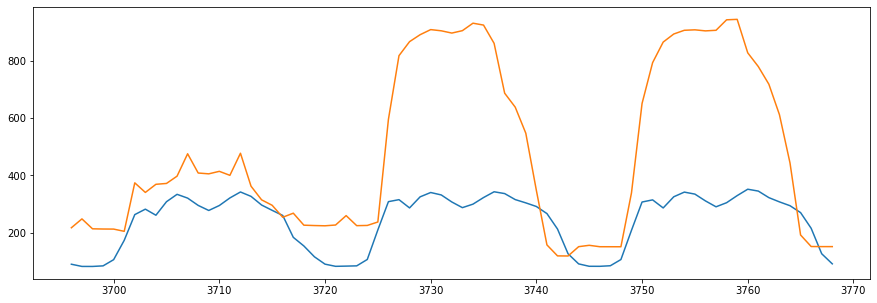

In [26]:
fig,ax=plt.subplots(figsize=[15,5])
startday = 154
ndays=3
start=24*startday
end=start+24*ndays
data1.loc[start:end, 'total'].plot(ax=ax)
data2.loc[start:end, 'total'].plot(ax=ax)

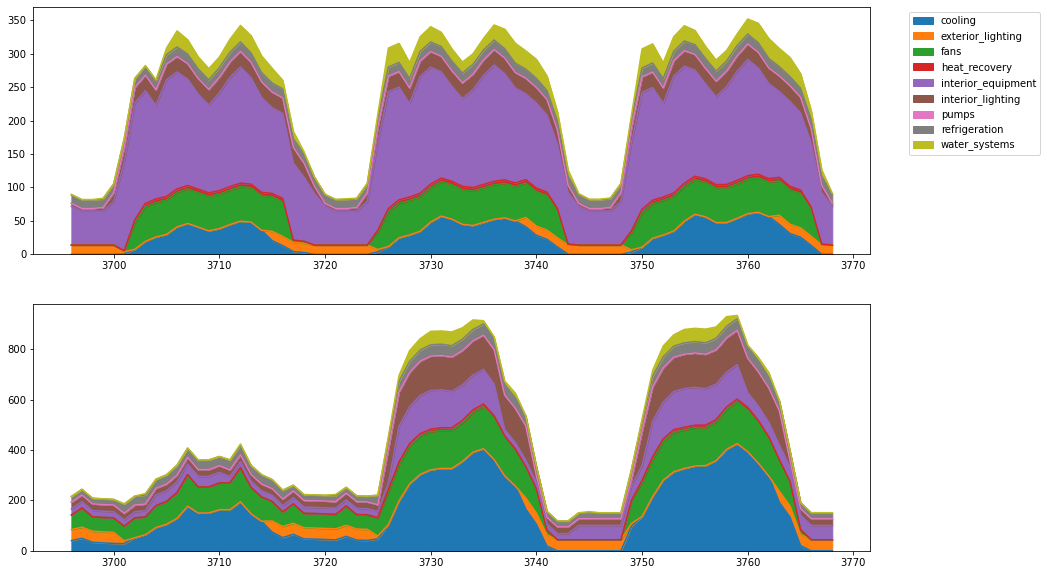

In [27]:
fig,ax=plt.subplots(2,1,figsize=[15,10])
data1.loc[start:end, bldg_eu_cols].plot.area(ax=ax[0], legend=False)
data2.loc[start:end, bldg_eu_cols].plot.area(ax=ax[1], legend=False)
ax[1].set_ylim(ax[1].get_ylim())
ax[0].legend(bbox_to_anchor=[1.04,1.0])

In [28]:
'-'.join(['_'.join('.'.join(data2.loc[0,'weather_station'].split('.')[:-2]).split('_')[1:]), 
          data2.loc[0,'building_type'].replace(' ','_'), 
          data2.loc[0,'location']])

'LA_Lake.Charles.Muni-SecondarySchool-2A'

In [29]:
'_'.join('.'.join(data2.loc[0,'weather_station'].split('.')[:-2]).split('_')[1:])

'LA_Lake.Charles.Muni'

In [30]:
counter = {}
columns=data1.columns
i=-1
#n_at_once = 100 #How many buildings to read in at once
#for j in range(100):
f = open(os.path.join(indir,
                      r'timeseries_{w}weighted\building_load_shapes'.format(
                          w='' if weighted else 'un'), 'file_names.txt'), 'a')
while True:
    i+=1
    datai = data.loc[i*n_hr:(i+1)*n_hr-1].reset_index(drop=True)
    #data = pd.read_csv(os.path.join(indir, data_file), nrows=8784*n_at_once, 
    #                   skiprows=range(1,8784*i*n_at_once+1), header=0)

    #Stop when we run out of data.
    assert len(datai)>0, "Oops out of data: "+str(len(datai))
    assert len(datai)==n_hr, 'Something is wrong with our stride'
    
    assert datai.loc[0,'month'] == data1.loc[0,'month']
    #assert datai.loc[-1,'time'] == data1.loc[-1,'time']
    #Generate name to check uniqueness by building, weather station, and upgrade
    name='-'.join(['.'.join(datai.loc[0,'weather_station'].split('.')[:-1]),  
                   data_file.split('-')[0],
                   datai.loc[0,'building_type'].replace(' ','_'),])
    #Get a counter to append to building type if there is more than one
    if name in counter.keys():
        counter[name]+=1
    else:
        counter[name]=0
    #Re-order for readability
    name='-'.join(['_'.join('.'.join(datai.loc[0,'weather_station'].split('.')[:-2]).split('_')[1:]), 
          datai.loc[0,'building_type'].replace(' ','_'), 
          datai.loc[0,'location'], upgrade])
    #name = '_'.join([name,str(counter[name])])
    print(str(i)+': '+name)
    f.write(str(i)+': '+name+'\n')
    datai[eu_cols+['total']].to_csv(
        os.path.join(indir,r'timeseries_{w}weighted\building_load_shapes'.format(w='' if weighted else 'un'), name+'.csv'))
    #assert False
    
f.close()

0: LA_Lake.Charles.Muni-FullServiceRestaurant-2A-envelope_plus_controls_plus_equipment
1: LA_Lake.Charles.Muni-PrimarySchool-2A-envelope_plus_controls_plus_equipment
2: LA_Lake.Charles.Muni-SecondarySchool-2A-envelope_plus_controls_plus_equipment
3: TX_Alice.Intl-LargeOffice-2A-envelope_plus_controls_plus_equipment
4: TX_Alice.Intl-Outpatient-2A-envelope_plus_controls_plus_equipment
5: TX_Alice.Intl-PrimarySchool-2A-envelope_plus_controls_plus_equipment
6: TX_Alice.Intl-QuickServiceRestaurant-2A-envelope_plus_controls_plus_equipment
7: TX_Alice.Intl-RetailStandalone-2A-envelope_plus_controls_plus_equipment
8: TX_Alice.Intl-RetailStripmall-2A-envelope_plus_controls_plus_equipment
9: TX_Alice.Intl-SecondarySchool-2A-envelope_plus_controls_plus_equipment
10: TX_Alice.Intl-SmallHotel-2A-envelope_plus_controls_plus_equipment
11: TX_Alice.Intl-SmallOffice-2A-envelope_plus_controls_plus_equipment
12: TX_Alice.Intl-Warehouse-2A-envelope_plus_controls_plus_equipment
13: TX_Angelina.Co-FullServi

AssertionError: Oops out of data: 0

In [31]:
ws = 'TX_Corpus.Christi.Int'#-2A-equipment_only
loc='2A'
bt = 'LargeOffice'
#upgrade = 3

data3 = pd.read_csv(os.path.join(indir, r'timeseries_{w}weighted'.format(w='' if weighted else 'un'), 'building_load_shapes', 
                                 '{w}-{b}-{l}-baseline.csv'.format(w=ws, b=bt, l=loc)))
data4 = pd.read_csv(os.path.join(indir, r'timeseries_{w}weighted'.format(w='' if weighted else 'un'), 'building_load_shapes', 
                                 '{w}-{b}-{l}-{u}.csv'.format(w=ws, b=bt, u=upgrade, l=loc)))

In [32]:
bldg_eu_cols = np.array(eu_cols)[data4[eu_cols].sum()>0]
bldg_eu_cols

array(['cooling', 'exterior_lighting', 'fans', 'heat_recovery',
       'heat_rejection', 'heating', 'interior_equipment',
       'interior_lighting', 'pumps', 'water_systems'], dtype='<U18')

In [33]:
bldg_eu_cols[[c not in np.array(eu_cols)[data3[eu_cols].sum()>0] for c in bldg_eu_cols]]

array(['heat_recovery'], dtype='<U18')

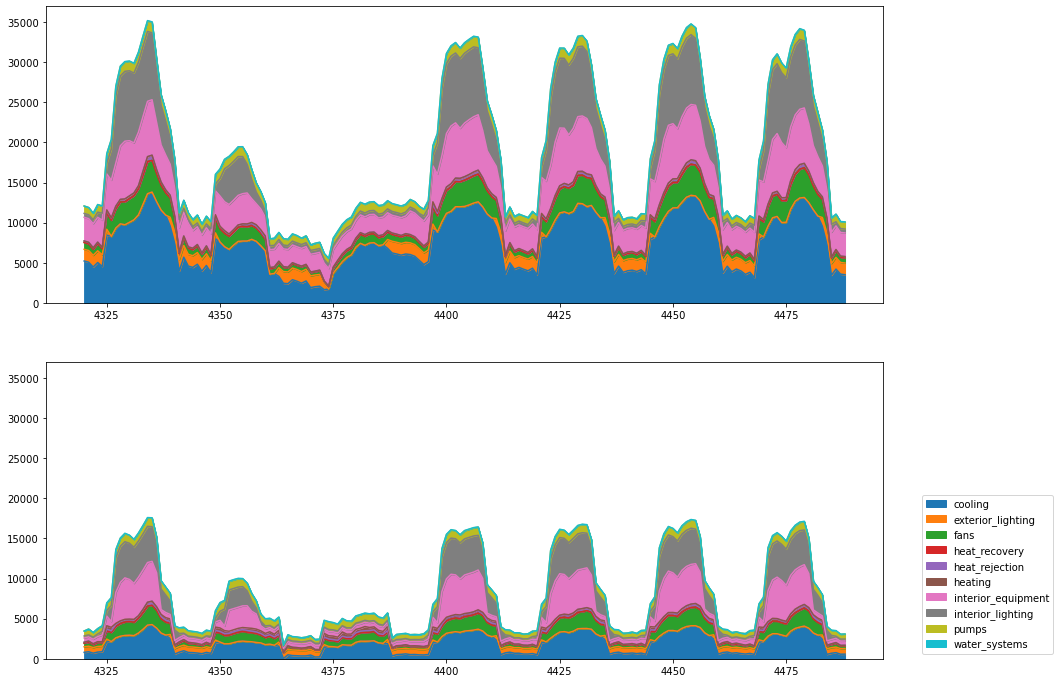

In [34]:
startday = 180
ndays=7
start=24*startday
end=start+24*ndays
fig,ax=plt.subplots(2,1,figsize=[15,12])
data3.loc[start:end, bldg_eu_cols].plot.area(ax=ax[0], legend=False)
data4.loc[start:end, bldg_eu_cols].plot.area(ax=ax[1], legend=False)
ax[1].set_ylim(ax[0].get_ylim())
ax[1].legend(loc='lower left', bbox_to_anchor=[1.04, 0])
#plt.tight_layout()

In [ ]:
fig,ax=plt.subplots(figsize=[15,5])
eu='cooling'
data3.loc[start:end, eu].plot(ax=ax, label='base')
data4.loc[start:end, eu].plot(ax=ax, label='EE')
ax.legend()
#ax[1].set_ylim(ax[0].get_ylim())
#fig.legend(loc='lower center', ncol=5, bbox_to_anchor=[0.4, -0.01])

In [ ]:
fig,ax=plt.subplots(figsize=[15,5])
eu='heating'
data3.loc[start:end, eu].plot(ax=ax, label='base')
data4.loc[start:end, eu].plot(ax=ax, label='EE')
ax.legend()

In [ ]:
(data3[bldg_eu_cols].sum() - data4[bldg_eu_cols].sum()).round(2)

In [ ]:
data3['total'].plot()



In [ ]:
data4['total'].plot()